In [ ]:
import os; import glob;

# FINAL CODE
# Clean up poorly named Raman data files

temp='165'; sampLettList=['d'];

for sampLett in sampLettList:
    path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/'+temp+'/'+temp+'_'+sampLett+'/';
    fileList=glob.glob(path+'/*.bmp');
    [os.remove(file) for file in fileList];

    fileList=glob.glob(path+'/*.txt');
    for filename in fileList:
        num=filename.split('/')[8].split(' ')[0]; # This line was changed to deal with different input names
        #num=filename.split('_')[2];
        num=num.lstrip('0');
        newFilename='popoffRaman_'+temp+'_'+sampLett+'_'+num+'.txt';
        #print(newFilename)
        os.rename(os.path.join(path,filename),os.path.join(path,newFilename))
    print(temp+' '+sampLett+' done')

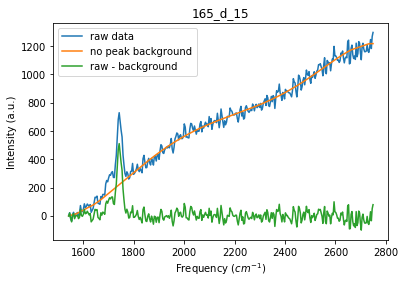

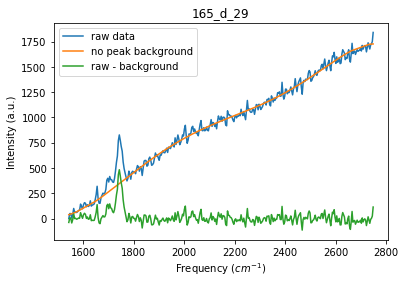

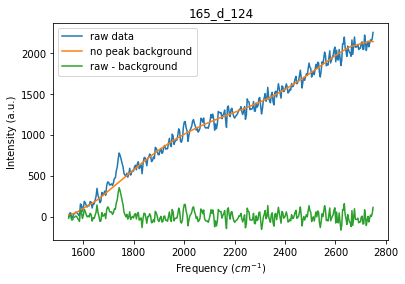

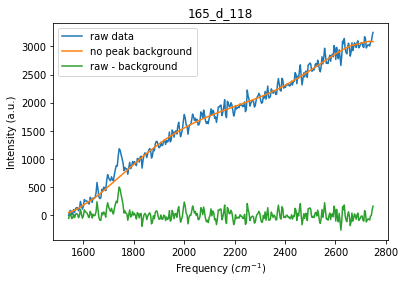

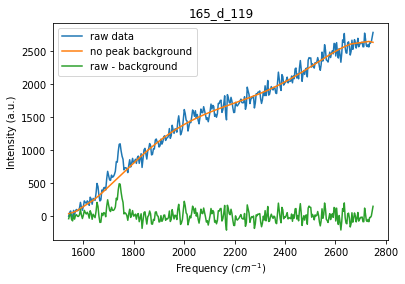

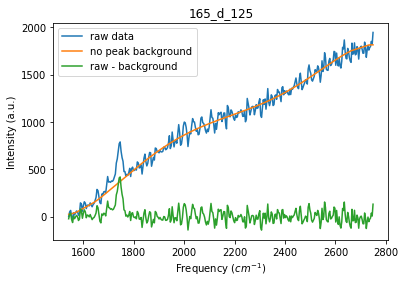

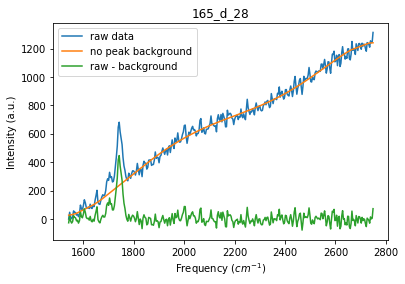

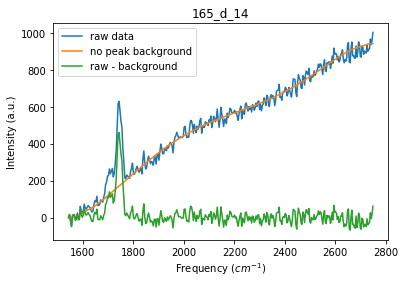

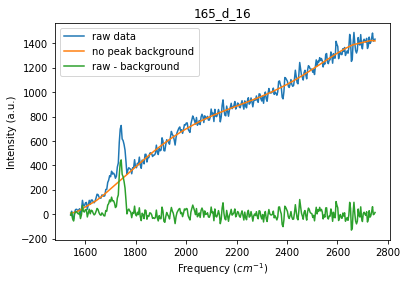

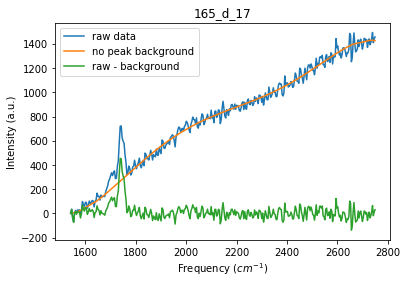

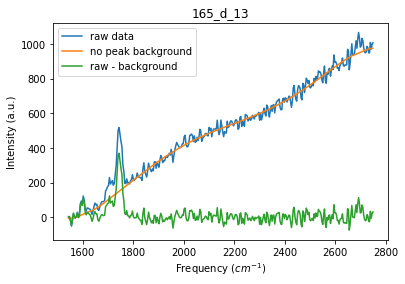

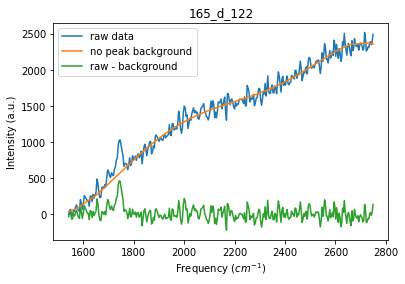

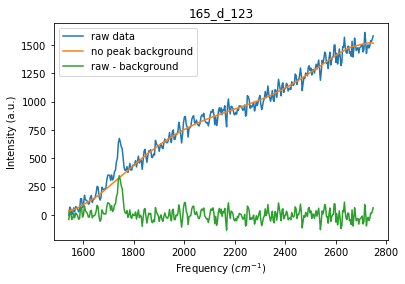

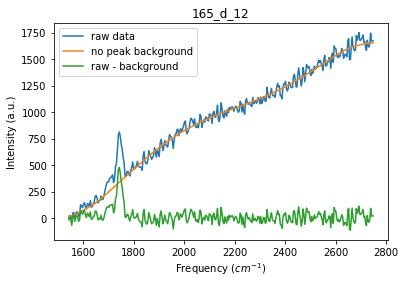

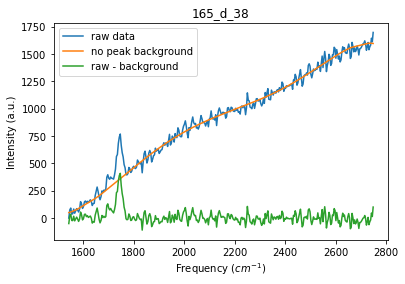

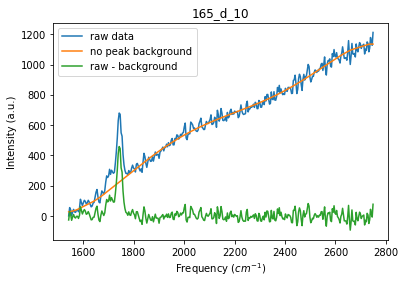

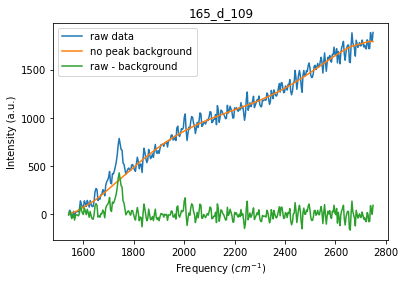

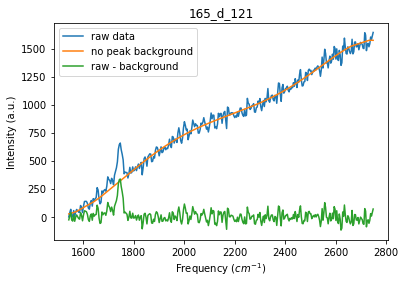

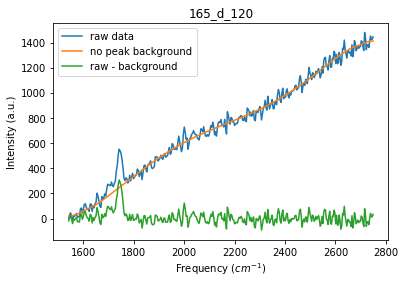

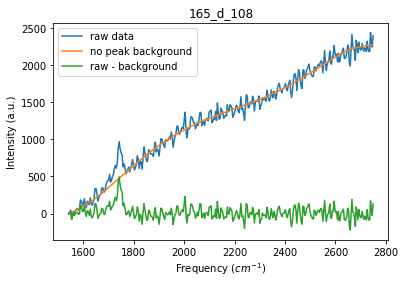

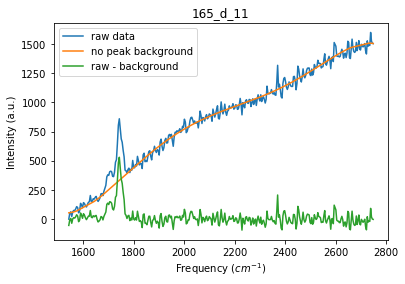

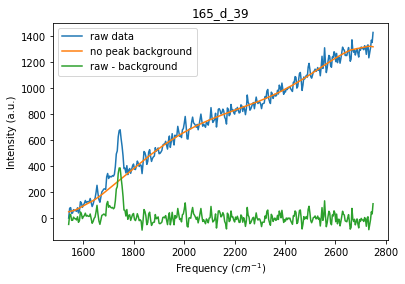

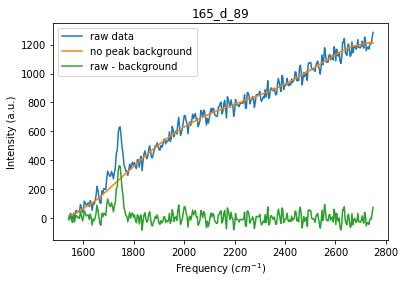

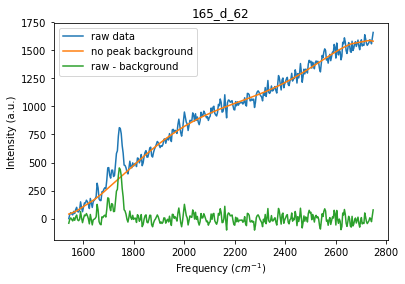

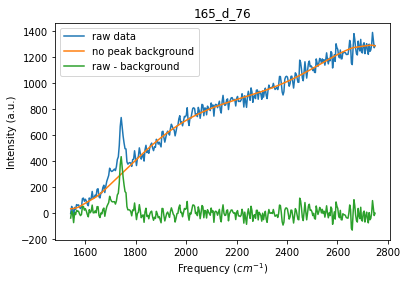

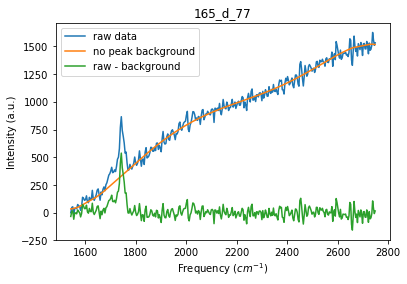

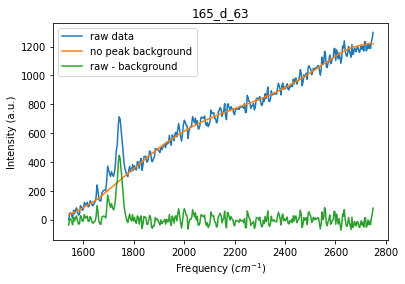

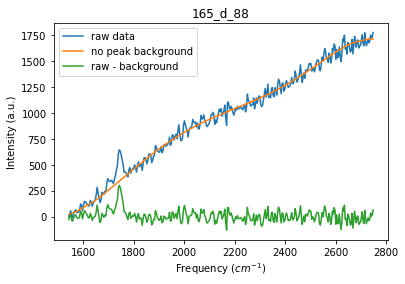

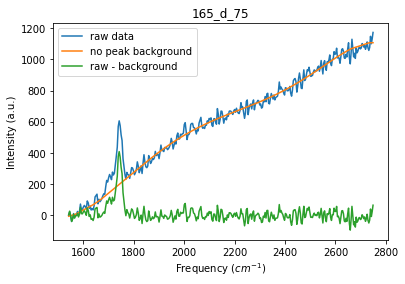

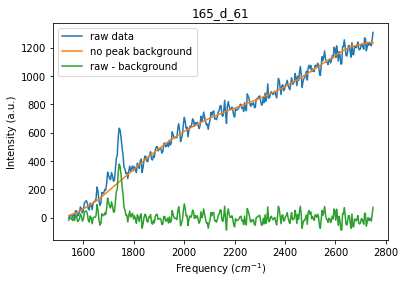

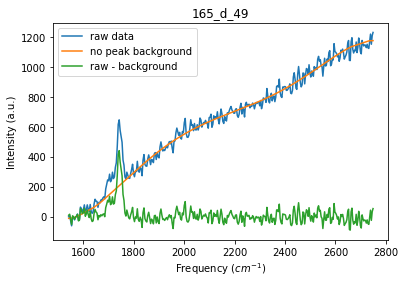

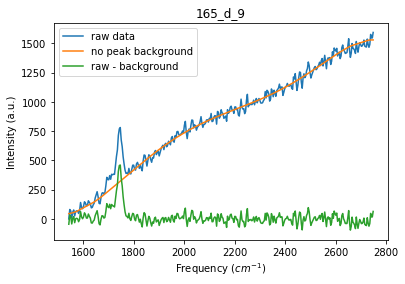

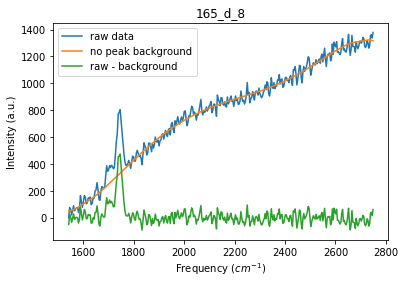

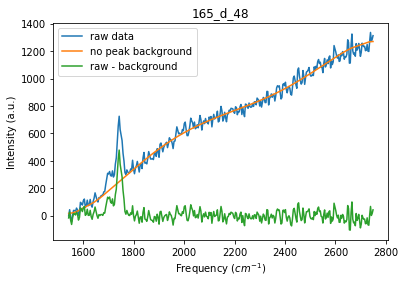

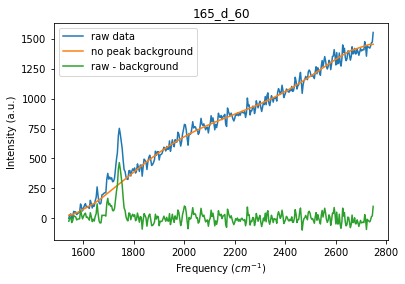

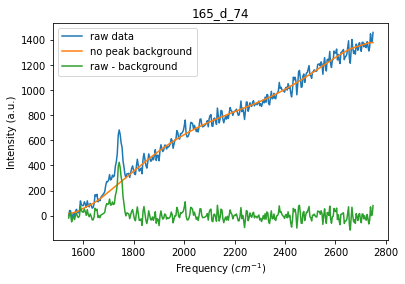

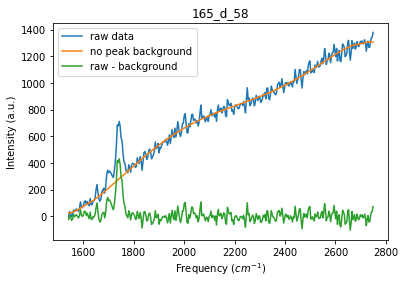

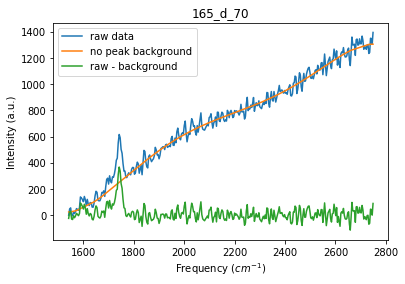

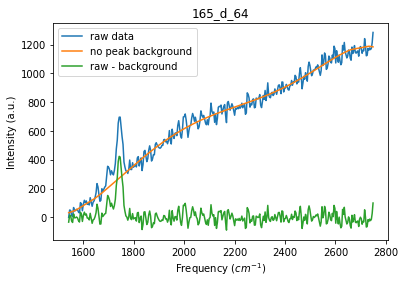

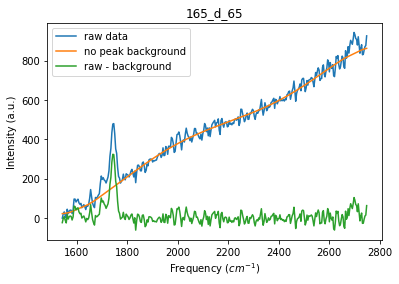

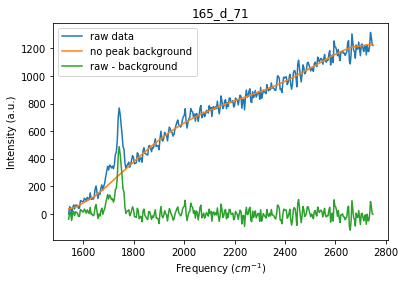

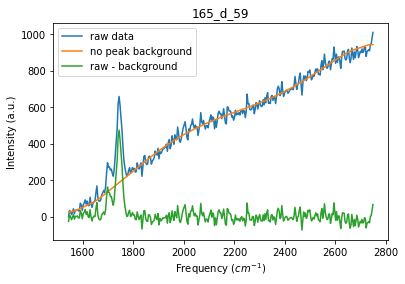

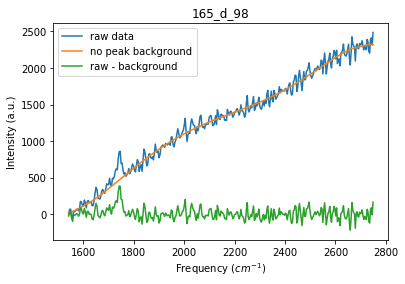

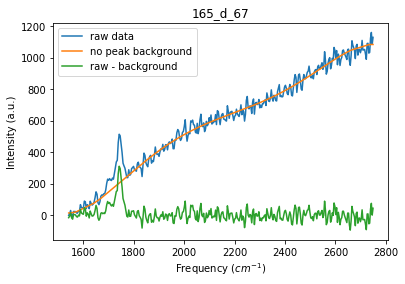

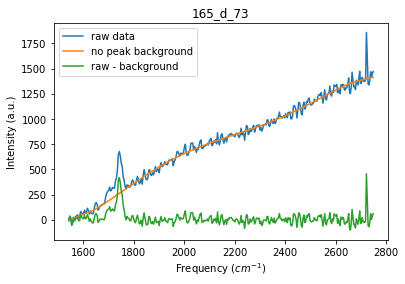

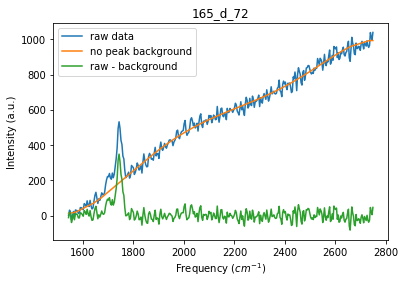

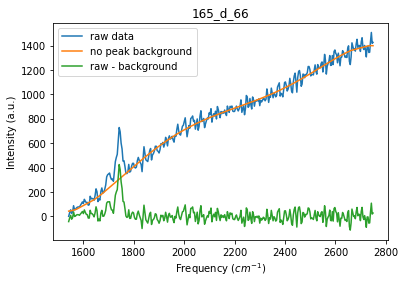

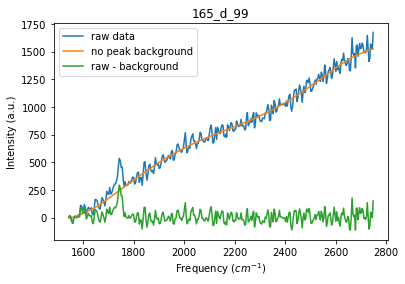

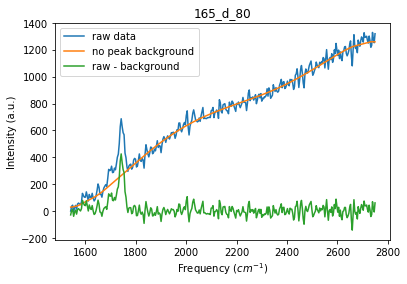

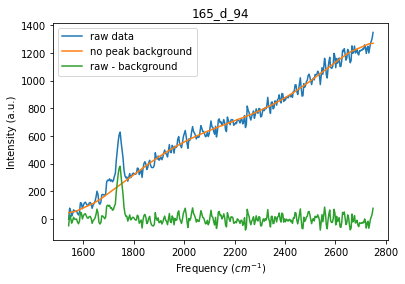

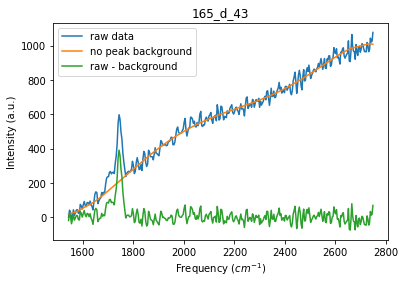

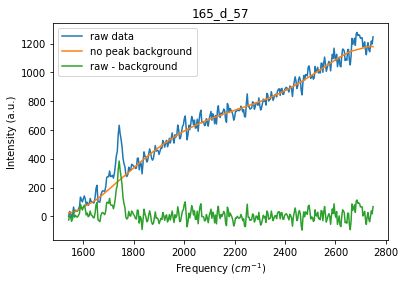

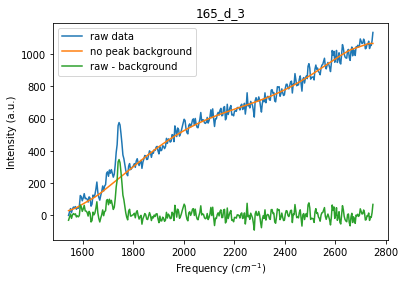

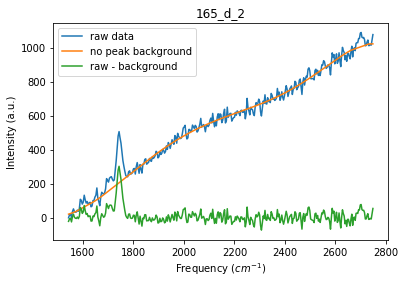

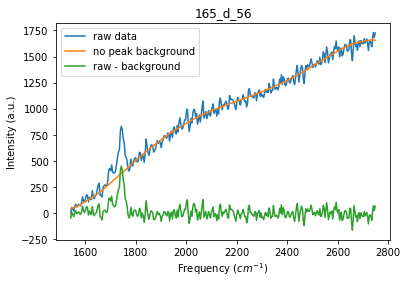

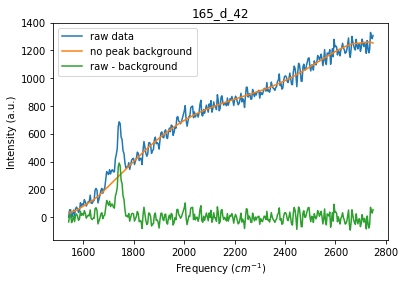

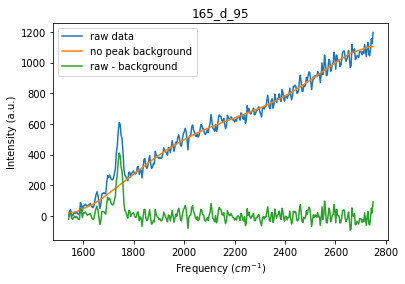

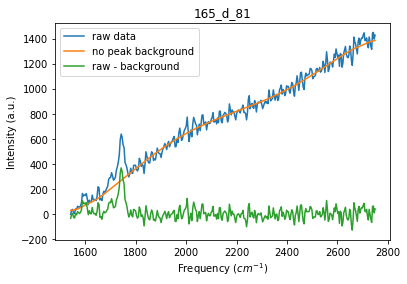

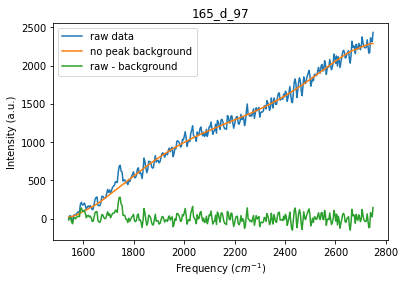

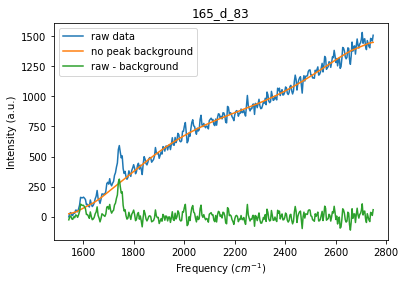

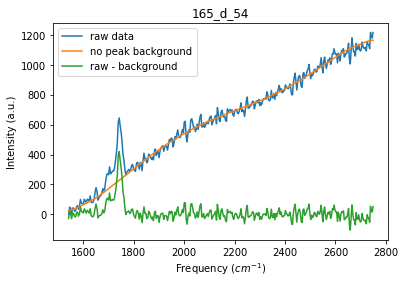

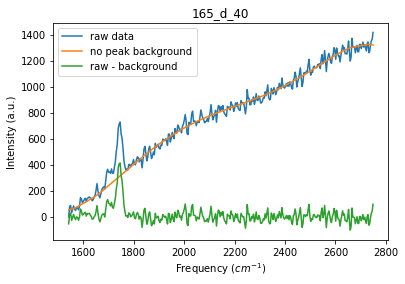

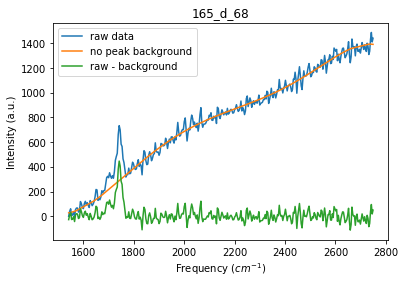

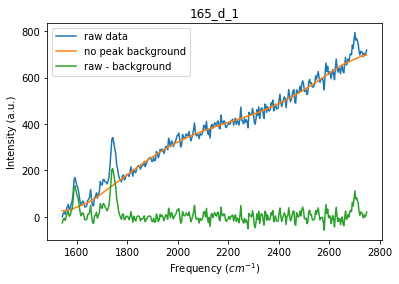

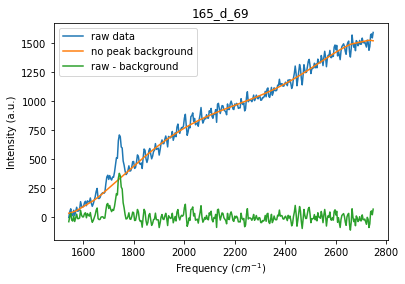

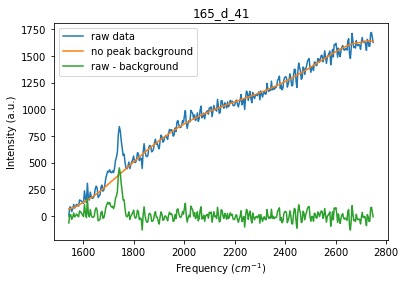

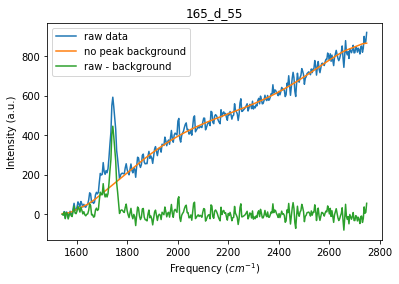

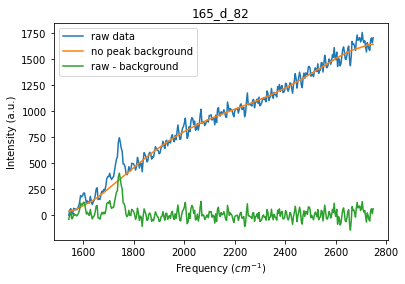

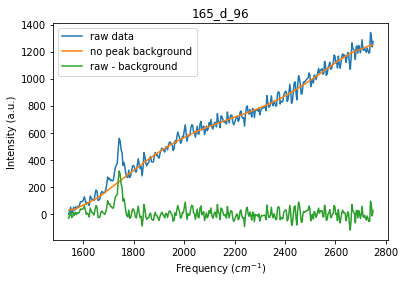

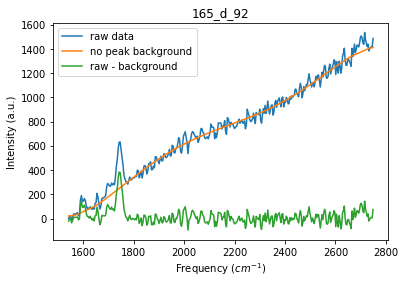

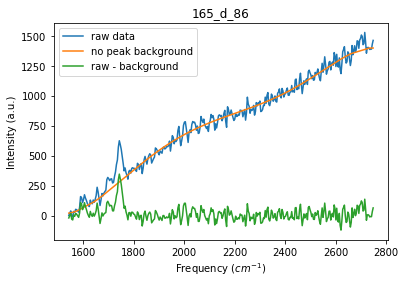

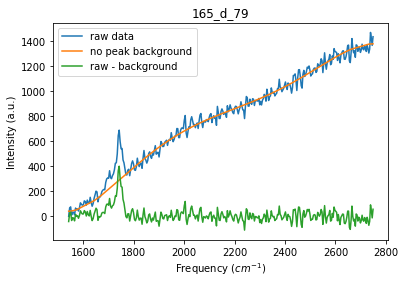

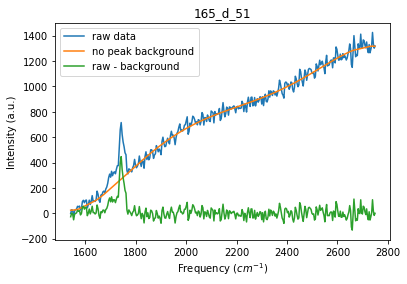

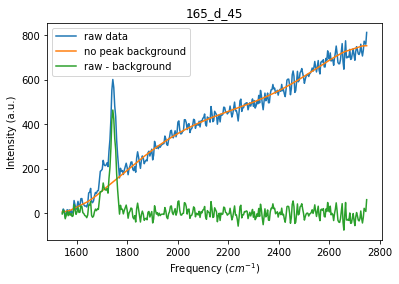

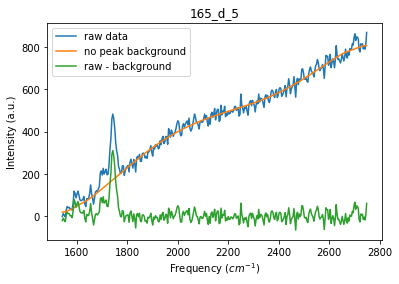

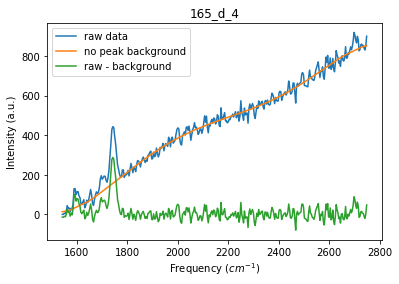

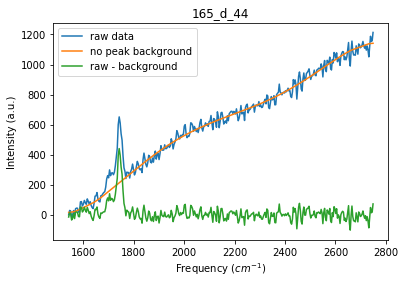

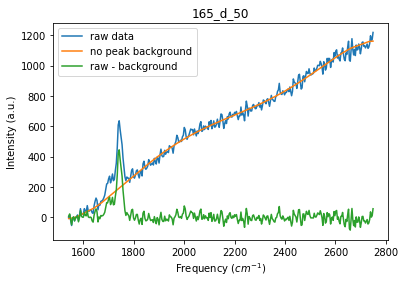

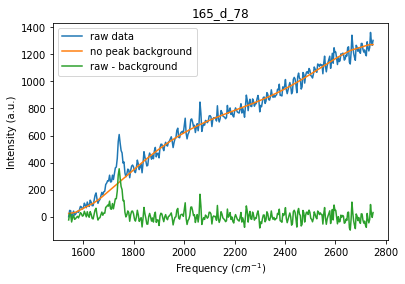

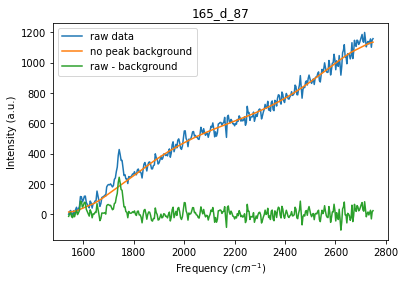

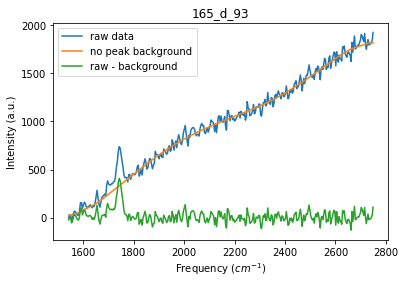

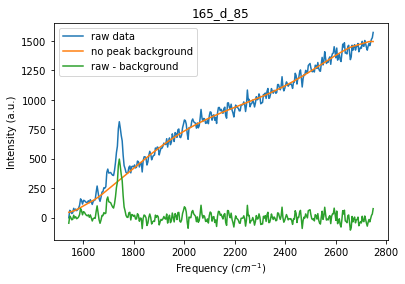

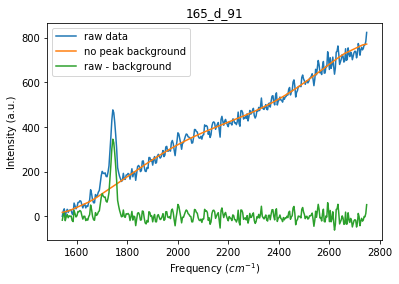

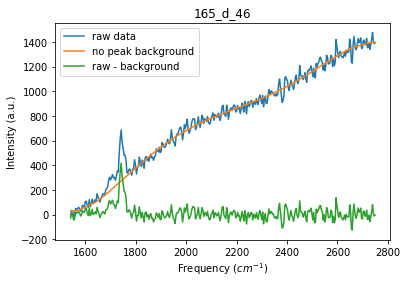

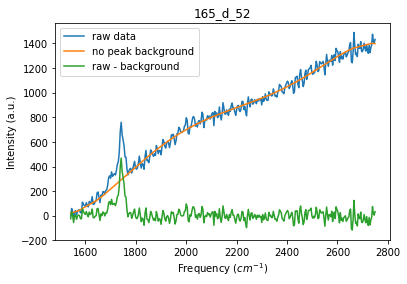

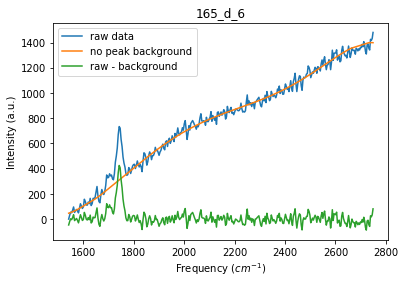

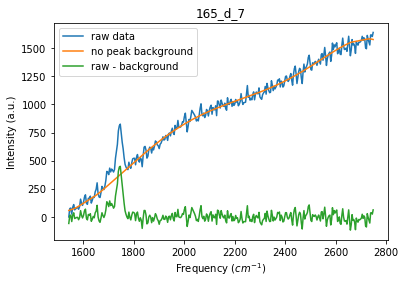

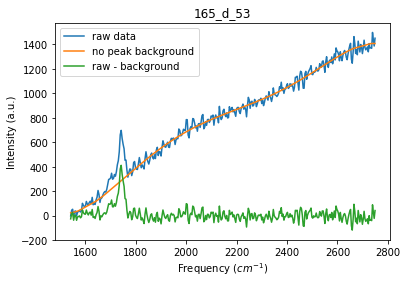

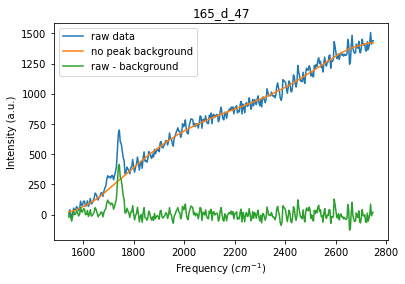

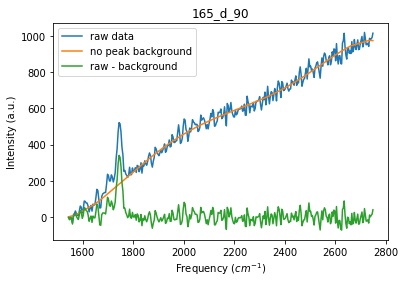

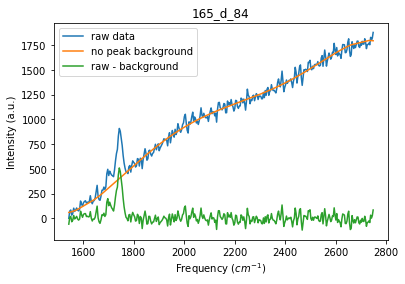

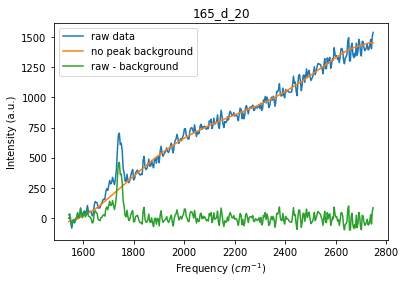

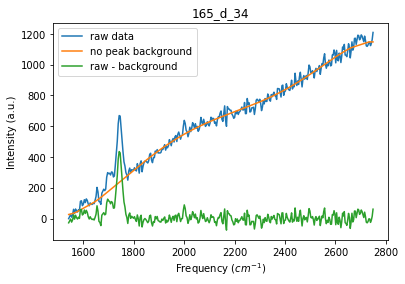

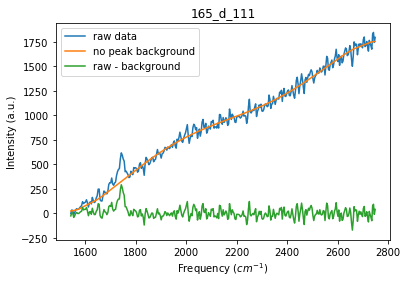

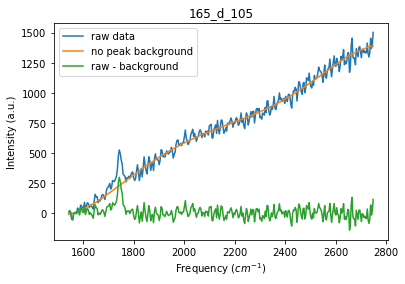

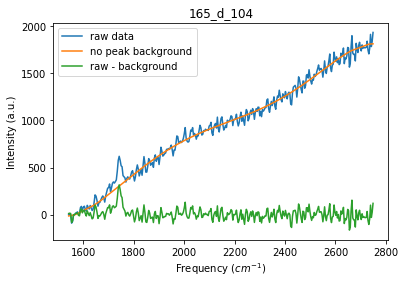

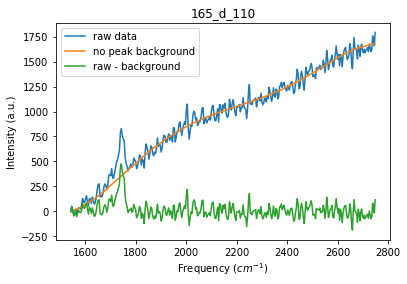

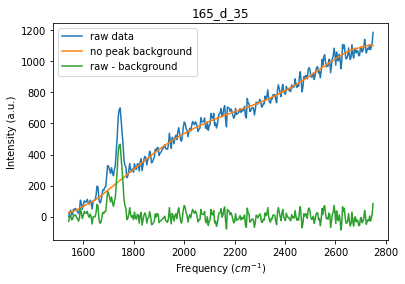

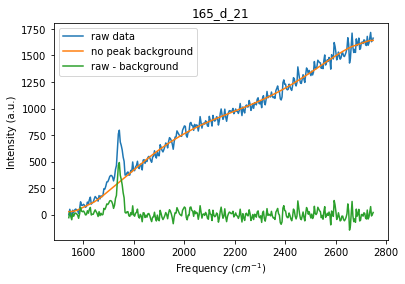

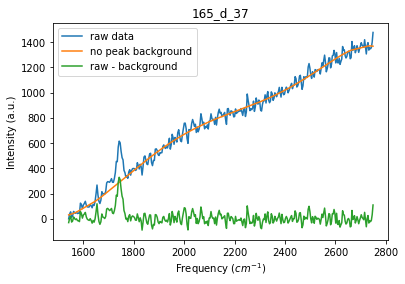

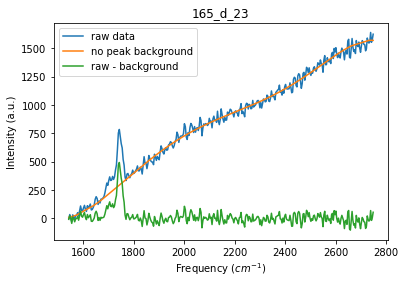

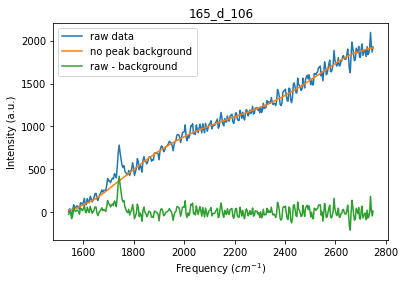

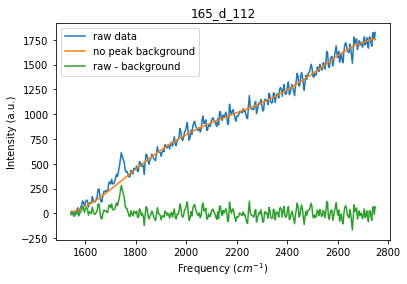

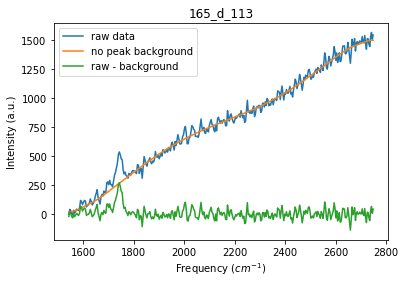

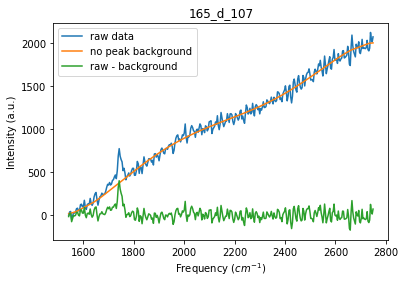

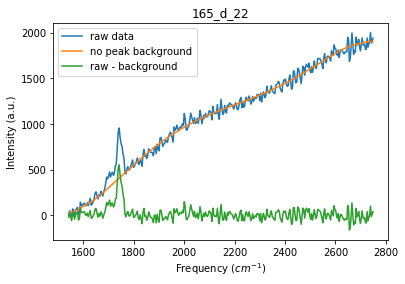

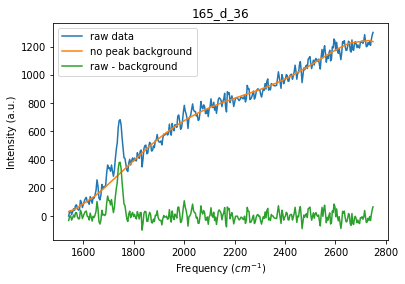

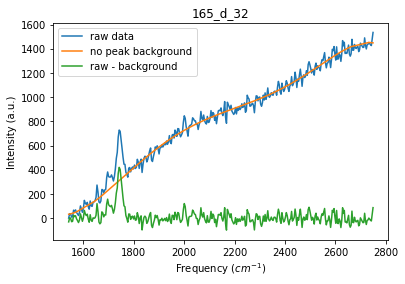

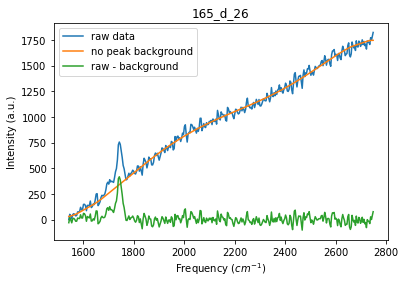

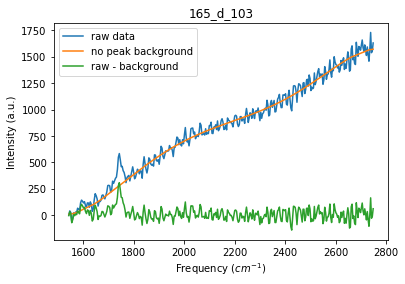

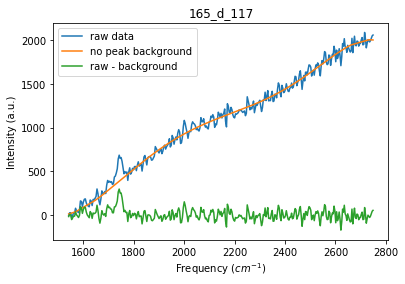

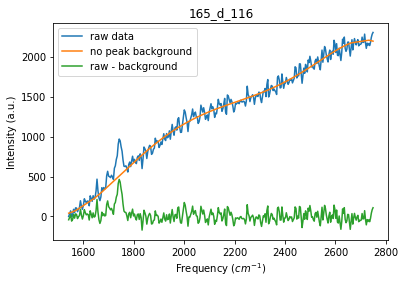

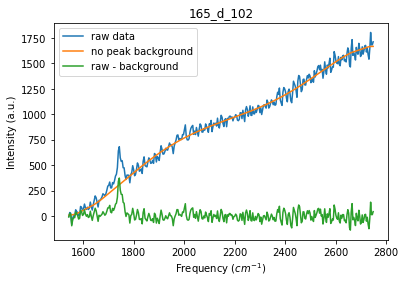

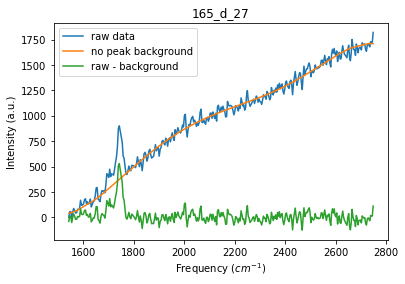

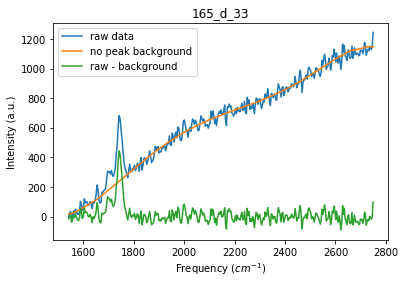

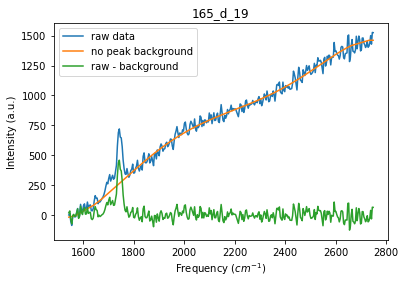

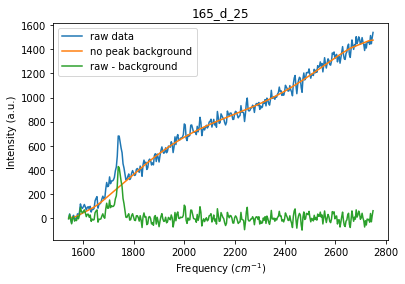

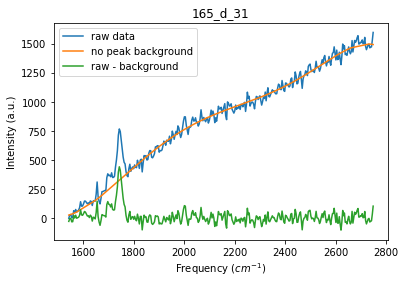

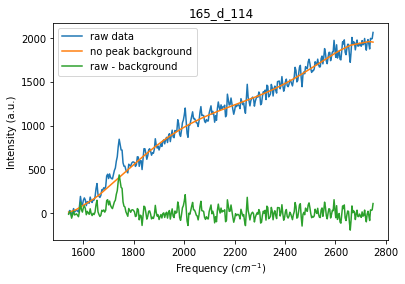

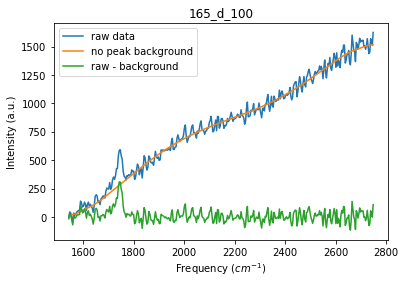

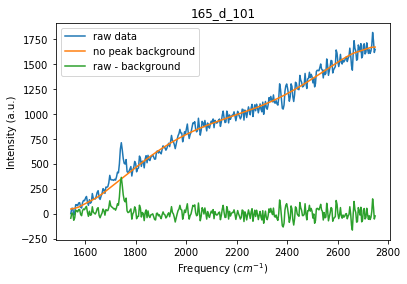

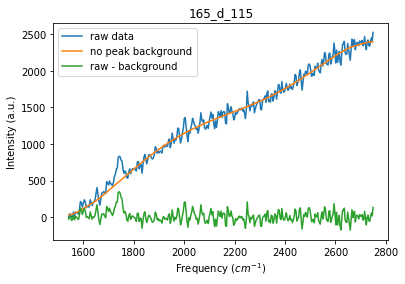

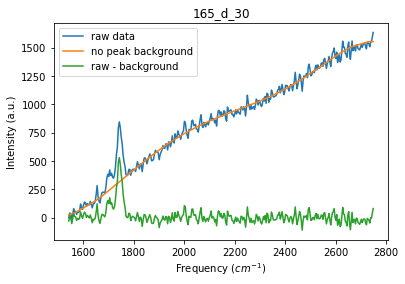

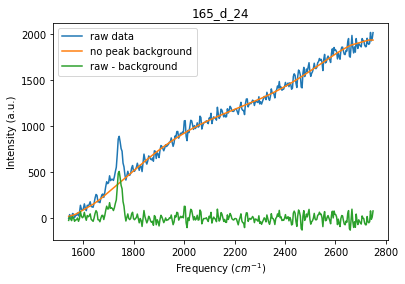

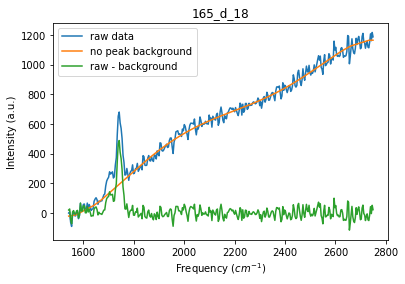

165 d done


In [1]:
# FINAL CODE
# Fits and removes non-peak background in all collected spectra regradless of graphene presence and 
# saves fixed spectra for later consideration. Automated. (Version 3rd draft c)

%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt; import numpy.polynomial.polynomial as poly; import glob; 
import os;

path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';
temp='165'; lettList=['d'];

for lett in lettList:
    # Load spectrum to be considered
    # Extract subsection of gr/PMMA data to be specifically used for analysis ie where graphene peaks will show
    folder=path+temp+'/'+temp+'_'+lett+'/Renamed Data/';
    fileList=glob.glob(folder+'*.txt');
    
    for file in fileList:
        a=np.genfromtxt(file,delimiter='\t'); 
        x=a[2:,0]; y=a[2:,1];
        idx1=int(np.argwhere(x>1540)[0]); idx2=int(np.argwhere(x>2750)[0]); 
        x=x[idx1:idx2]; y=y[idx1:idx2]-y[idx1];
    
        # Remove peak data from x and y to get background. Fit background to 6 deg polynomial. 
        # Subtract background from y data
        idx3=np.argwhere(x>1575)[0][0]; idx4=np.argwhere(x>1640)[0][0]; 
        idx5=np.argwhere(x>1675)[0][0]; idx6=np.argwhere(x>1800)[0][0]; 
        idx7=np.argwhere(x>2663)[0][0]; idx8=np.argwhere(x>2730)[0][0]; 
        xNoPeaks=np.concatenate((x[:idx3],x[idx4:idx5],x[idx6:idx7],x[idx8:]));
        yNoPeaks=np.concatenate((y[:idx3],y[idx4:idx5],y[idx6:idx7],y[idx8:]));
    
        coefs=poly.polyfit(xNoPeaks,yNoPeaks,6); yFittedNoPeaks=poly.polyval(xNoPeaks,coefs);
        yFitted=poly.polyval(x,coefs); yFixed=y-yFitted;
        plt.plot(x,y,xNoPeaks,yFittedNoPeaks,x,yFixed); 
        plt.legend(('raw data','no peak background','raw - background')); 
        plt.title(file.split('/')[-1].split('.')[0][12:]);
        plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); 
        
        newFile1=path+temp+'/'+temp+'_'+lett+'/Plots/'+file.split('/')[-1].split('.')[0]+'_plot.png';
        plt.savefig(newFile1,format='png'); plt.show()
        
        data=np.vstack((x,yFixed)).transpose(); 
        newFile2=path+temp+'/'+temp+'_'+lett+'/Corrected Data/'+file.split('/')[-1].split('.')[0]+'_flat.csv'
        np.savetxt(newFile2,data,delimiter=',');
        
        
    print(temp+' '+lett+' done')

In [ ]:
# FINAL CODE
# This code corrects Raman spectra to be included as representative data in the thermal release paper

%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; from scipy.signal import find_peaks; 
from scipy.optimize import curve_fit; import numpy.polynomial.polynomial as poly;

def lorentz(x, center, width, A):
    return (A*(0.5*width)/(np.pi*(((x-center)**2)+((0.5*width)**2))))

path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';

# Graphene on copper
a=np.genfromtxt(path+'Gr_Cu.txt',delimiter='\t'); 
xGr=a[2:,0]; yGr=a[2:,1];
idx1=int(np.argwhere(xGr>1540)[0]); idx2=int(np.argwhere(xGr>2750)[0]); 
xGr=xGr[idx1:idx2]; yGr=yGr[idx1:idx2]-yGr[idx1];

idx3=np.argwhere(xGr>1550)[0][0]; idx4=np.argwhere(xGr>1640)[0][0];
idx5=np.argwhere(xGr>2663)[0][0]; idx6=np.argwhere(xGr>2745)[0][0]; 
xNoPeaks=np.concatenate((xGr[:idx3],xGr[idx4:idx5],xGr[idx6:]));
yNoPeaks=np.concatenate((yGr[:idx3],yGr[idx4:idx5],yGr[idx6:]));

coefs=poly.polyfit(xNoPeaks,yNoPeaks,6); 
yFittedNoPeaks=poly.polyval(xNoPeaks,coefs); yFittedGr=poly.polyval(xGr,coefs); yFixedGr=yGr-yFittedGr; 
plt.plot(xGr,yGr,xNoPeaks,yFittedNoPeaks,xGr,yFixedGr);
plt.legend(('Gr','Gr No peak background','Gr - background')); plt.title('Gr/Cu'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
np.savetxt(path+'Gr_Cu_fixed.csv',np.vstack((xGr,yFixedGr)).transpose(),delimiter=',');

# Graphene on PMMA
b=np.genfromtxt(path+'150/Gr Spectra 9/Gr_PMMA_150_17.txt',delimiter='\t'); 
xGrPoly=b[2:,0]; yGrPoly=b[2:,1];
idx1=int(np.argwhere(xGrPoly>1540)[0]); idx2=int(np.argwhere(xGrPoly>2750)[0]); 
xGrPoly=xGrPoly[idx1:idx2]; yGrPoly=yGrPoly[idx1:idx2]-yGrPoly[idx1];

idx3=np.argwhere(xGrPoly>1575)[0][0]; idx4=np.argwhere(xGrPoly>1640)[0][0]; 
idx5=np.argwhere(xGrPoly>1675)[0][0]; idx6=np.argwhere(xGrPoly>1800)[0][0]; 
idx7=np.argwhere(xGrPoly>2663)[0][0]; idx8=np.argwhere(xGrPoly>2730)[0][0]; 
xNoPeaks=np.concatenate((xGrPoly[:idx3],xGrPoly[idx4:idx5],xGrPoly[idx6:idx7],xGrPoly[idx8:]));
yNoPeaks=np.concatenate((yGrPoly[:idx3],yGrPoly[idx4:idx5],yGrPoly[idx6:idx7],yGrPoly[idx8:]));

coefs=poly.polyfit(xNoPeaks,yNoPeaks,6); 
yFittedNoPeaks=poly.polyval(xNoPeaks,coefs); yFittedGrPoly=poly.polyval(xGrPoly,coefs); 
yFixedGrPoly=yGrPoly-yFittedGrPoly; 
plt.plot(xGrPoly,yGrPoly,xNoPeaks,yFittedNoPeaks,xGrPoly,yFixedGrPoly);
plt.legend(('Gr/PMMA','Gr/PMMA No peak background','Gr/PMMA - background')); plt.title('Gr/PMMA'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
np.savetxt(path+'Gr_PMMA_fixed.csv',np.vstack((xGrPoly,yFixedGrPoly)).transpose(),delimiter=',');

# PMMA
c=np.genfromtxt(path+'PMMA_bkg_v2.csv',delimiter=','); xPoly=c[:,0]; yPoly=c[:,1];
plt.plot(xPoly,yPoly); 
plt.title('PMMMA'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
np.savetxt(path+'PMMA_fixed.csv',c,delimiter=',');

In [ ]:
# FINAL CODE
# Tests different fitting models for graphene peaks (Edited Version 4th draft a)

%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt; import lmfit; 
from lmfit.models import PseudoVoigtModel, VoigtModel, GaussianModel, LorentzianModel;

path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';
a=np.genfromtxt(path+'150/150_a/Corrected Data/popoffRaman_150_a_17_flat.csv',delimiter=',');
x=a[:,0]; y=a[:,1];
idx1=np.argwhere(x>1600)[0][0]; idx2=np.argwhere(x>1850)[0][0];
x=x[idx1:idx2]; y=y[idx1:idx2];

# Test different peak function models and compare fit and errors
models=[VoigtModel(),GaussianModel(),PseudoVoigtModel(),LorentzianModel()];

for model in models:
    params = model.guess(y,x=x);
    output=model.fit(y,params,x=x);
    print(output.fit_report())
    uncert=output.eval_uncertainty(sigma=3);
    plt.scatter(x,y,color='blue',label='Raw data');
    plt.plot(x,output.best_fit,color='red',label='Fitted data');
    plt.fill_between(x,output.best_fit-uncert,output.best_fit+uncert,color='#ABABAB',label=r'$3\sigma$');
    plt.xlim([1600,1850]); plt.legend();
    plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)');
    plt.title(str(model).split('(')[1].split(')')[0]); plt.show()

In [ ]:
# DEPRECATED
# Fits G and 2D peaks of all spectra using inputted peak ranges and Voigt model. Saves fitted params for cluster
# analysis

%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt; import lmfit; from lmfit import Parameters;
from lmfit.models import PseudoVoigtModel, LorentzianModel; import glob;

path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';
temp='150'; letters=['a','b','c','d'];

model=PseudoVoigtModel();
ampMax=np.inf; cenMax=np.inf; fwhmMax=50;
maxList=[ampMax,cenMax,fwhmMax,1,np.inf,np.inf];
for l in letters:
    folder=path+temp+'/'+temp+'_'+l+'/Corrected Data/';
    fileList=sorted(glob.glob(folder+'*_flat.csv'),key=lambda name: int(name[99:-9]));
    ampG=[]; cenG=[]; fwhmG=[]; fracG=[]; 
    amp2D=[]; cen2D=[]; fwhm2D=[]; frac2D=[]; 
    xShiftList=[];
    for file in fileList:
        #print(file);
        a=np.genfromtxt(file,delimiter=',');
        x=a[:,0]; y=a[:,1];
        
        # Select PMMA peak
        idx1=np.argwhere(x>1650)[0][0]; idx2=np.argwhere(x>1850)[0][0]; 
        xSub=x[idx1:idx2]; ySub=y[idx1:idx2];
        #plt.scatter(xSub,ySub,color='C1'); plt.plot(x,y,color='C0'); 
        #plt.title('PMMA peak'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)');
        #plt.show();

        # PMMA peak position used to calculate spectra offset
        realPolyCenter=1736; 
        # Fit PMMA peak to Voigt and get fitted peak center
        # Use lmfit to guess initial params, add min boundary as 0
        pars=model.guess(ySub,x=xSub);
        initParams=Parameters();
        [initParams.add(p,pars[p].value,min=0,max=maxList[m]) for m,p in enumerate(pars)];
        output=model.fit(ySub,initParams,x=xSub);
        fittedParams=output.best_values;
        # Plot peak fit and uncertainity
        #uncert=output.eval_uncertainty(sigma=3);
        measuredPolyCenter=fittedParams['center'];
        #plt.scatter(xSub,ySub,color='blue',label='Raw data',zorder=10);
        #plt.plot(xSub,output.best_fit,color='red',label='Fitted data');
        #plt.fill_between(xSub,output.best_fit-uncert,output.best_fit+uncert,color='#ABABAB',label=r'$3\sigma$');
        #plt.axvline(measuredPolyCenter,color='black'); 
        #plt.title('Fitted PMMA peak in spectrum'); 
        #plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
        # Correct x offset
        #print('measured PMMA center = '+str(measuredPolyCenter))
        xShift=realPolyCenter-measuredPolyCenter; x+=xShift; 
        #print('x shift = ',xShift,'cm-1')
        xShiftList.append(xShift);

        idx3=np.argwhere(x>1500)[0][0]; idx4=np.argwhere(x>1640)[0][0]; 
        idx5=np.argwhere(x>2600)[0][0]; idx6=len(x)-1; #idx6=np.argwhere(x>2740)[0][0];
        xSubG=x[idx3:idx4]; ySubG=y[idx3:idx4]; 
        xSub2D=x[idx5:idx6]; ySub2D=y[idx5:idx6];

        #plt.scatter(xSubG,ySubG,color='C1'); plt.scatter(xSub2D,ySub2D,color='C2'); plt.plot(x,y,color='C0'); 
        #plt.title('Graphene peaks'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); 
        #plt.show()

        x=xSubG; y=ySubG;
        pars=model.guess(y,x=x);
        initParams=Parameters();
        [initParams.add(p,pars[p].value,min=0,max=maxList[m]) for m,p in enumerate(pars)];
        output=model.fit(y,initParams,x=x);
        
        frac=output.best_values['fraction']; amp=output.best_values['amplitude']; 
        cen=output.best_values['center']; sigma=output.best_values['sigma'];
        idxCen=np.argwhere(x>cen)[0];
        height=output.best_fit[idxCen-1];
        ampG.append(height);
        cenG.append(cen);
        fwhmG.append(sigma*2);
        fracG.append(frac);
        
        #uncert=output.eval_uncertainty(sigma=3);
        #plt.scatter(x,y,color='blue',label='Raw data',zorder=15);
        #plt.plot(x,output.best_fit,color='red',label='Fitted data');
        #plt.fill_between(x,output.best_fit-uncert,output.best_fit+uncert,color='#ABABAB',label=r'$3\sigma$');
        #plt.legend(); plt.title('G peak fit'); 
        #plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)');
        #plt.show()

        x=xSub2D; y=ySub2D;
        pars=model.guess(y,x=x);
        initParams=Parameters();
        [initParams.add(p,pars[p].value,min=0,max=maxList[m]) for m,p in enumerate(pars)];
        output=model.fit(y,initParams,x=x);
        
        frac=output.best_values['fraction']; amp=output.best_values['amplitude']; 
        cen=output.best_values['center']; sigma=output.best_values['sigma'];
        idxCen=np.argwhere(x>cen)[0];
        height=output.best_fit[idxCen-1];

        amp2D.append(height);
        cen2D.append(cen);
        fwhm2D.append(sigma*2);
        frac2D.append(frac);
        
        
        #uncert=output.eval_uncertainty(sigma=3);
        #plt.scatter(x,y,color='blue',label='Raw data',zorder=15);
        #plt.plot(x,output.best_fit,color='red',label='Fitted data');
        #plt.fill_between(x,output.best_fit-uncert,output.best_fit+uncert,color='#ABABAB',label=r'$3\sigma$');
        #plt.legend(); plt.title('2D peak fit'); 
        #plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)');
        #plt.show()
    
    ampG=np.asarray(ampG); cenG=np.asarray(cenG); fwhmG=np.asarray(fwhmG); fracG=np.asarray(fracG);
    amp2D=np.asarray(amp2D); cen2D=np.asarray(cen2D); fwhm2D=np.asarray(fwhm2D); frac2D=np.asarray(frac2D);
    
    newFolder=folder=path+temp+'/'+temp+'_'+l+'/';
    np.savetxt(newFolder+'fittedGParams.csv',np.vstack((ampG,cenG,fwhmG,fracG)),delimiter=',');
    np.savetxt(newFolder+'fitted2DParams.csv',np.vstack((amp2D,cen2D,fwhm2D,frac2D)),delimiter=',');
    np.savetxt(newFolder+'xShift.csv',xShiftList,delimiter=',');
print('done')

In [ ]:
# DEPRECATED
# This code completes a cluster analysis using SciKitLearn to confirm graphene presence. It also plots graphene 
# assignments using a simple scattering plot

%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt; from sklearn import svm; 
from mlxtend.plotting import plot_decision_regions; import matplotlib.lines as mlines;

path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';
temp='150'; letters=['a','b','c','d']; letters='a'


fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(8,8)); 
plt.subplots_adjust(hspace=0.3,wspace=0.3);

# Simple scatter plot
for l in letters:
    #yes/no spectra assignments
    assignments=np.genfromtxt(path+temp+'/'+temp+'_'+l+'/finalAssignments.csv',delimiter=',');
    col=[]; symb=[];
    for n in range(0,len(assignments)):
        if assignments[n] == 1:
            col.append('C0'); symb.append('o');
        else:
            col.append('C1'); symb.append('x');   
    # fitted G peak params: amp, center, fwhm, fraction of Lorentizan to Gaussian
    fittedG=np.genfromtxt(path+temp+'/'+temp+'_'+l+'/fittedGParams.csv',delimiter=',').T;
    # fitted 2D peak params: amp, center, fwhm, fraction of Lorentizan to Gaussian
    fitted2D=np.genfromtxt(path+temp+'/'+temp+'_'+l+'/fitted2DParams.csv',delimiter=',').T;

    x=fittedG[:,0]; y=fitted2D[:,0];
    for n in range(0,len(assignments)):
        try:
            ax1.scatter(x[n],y[n],c=col[n],marker=symb[n]);
            if x[n] > 500:
                print()
        except:
            pass
    ax1.set_xlabel('G Peak Amplitude'); ax1.set_ylabel('2D Peak Amplitude'); #plt.ylim(0,5000);
    y=mlines.Line2D([],[],marker='o',linestyle='',color='C0',label='Yes graphene');
    n=mlines.Line2D([],[],marker='x',linestyle='',color='C1',label='No graphene');
    ax1.legend(handles=[y,n],loc='best');

    x=fittedG[:,2]; y=fitted2D[:,2];
    for n in range(0,len(assignments)):
        try:
            ax2.scatter(x[n],y[n],c=col[n],marker=symb[n]);
        except:
            pass
    ax2.set_xlabel('G Peak FWHM'); ax2.set_ylabel('2D Peak FWHM'); #plt.ylim(0,40);
    y=mlines.Line2D([],[],marker='o',linestyle='',color='C0',label='Yes graphene');
    n=mlines.Line2D([],[],marker='x',linestyle='',color='C1',label='No graphene');
    ax2.legend(handles=[y,n],loc='best');

    x=fittedG[:,0]; y=fittedG[:,2];
    for n in range(0,len(assignments)):
        try:
            ax3.scatter(x[n],y[n],c=col[n],marker=symb[n]);
        except:
            pass
    ax3.set_xlabel('G Peak Amplitude'); ax3.set_ylabel('G Peak FWHM'); #plt.ylim(0,40);
    y=mlines.Line2D([],[],marker='o',linestyle='',color='C0',label='Yes graphene');
    n=mlines.Line2D([],[],marker='x',linestyle='',color='C1',label='No graphene');
    ax3.legend(handles=[y,n],loc='best');

        
    x=fitted2D[:,0]; y=fitted2D[:,2];
    for n in range(0,len(assignments)):
        try:
            ax4.scatter(x[n],y[n],c=col[n],marker=symb[n]);
        except:
            pass
    ax4.set_xlabel('2D Peak Amplitude'); ax4.set_ylabel('2D Peak FWHM'); #plt.ylim(0,40);
    y=mlines.Line2D([],[],marker='o',linestyle='',color='C0',label='Yes graphene');
    n=mlines.Line2D([],[],marker='x',linestyle='',color='C1',label='No graphene');
    ax4.legend(handles=[y,n],loc='best');

plt.show()


for l in letters:
    #yes/no spectra assignments
    assignments=np.genfromtxt(path+temp+'/'+temp+'_'+l+'/finalAssignments.csv',delimiter=',');
    # fitted G peak params: amp, center, fwhm, fraction of Lorentizan to Gaussian
    fittedG=np.genfromtxt(path+temp+'/'+temp+'_'+l+'/fittedGParams.csv',delimiter=',').T;
    # fitted 2D peak params: amp, center, fwhm, fraction of Lorentizan to Gaussian
    fitted2D=np.genfromtxt(path+temp+'/'+temp+'_'+l+'/fitted2DParams.csv',delimiter=',').T;

    # Classification plot with a linear kernel
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(8,8)); 
    plt.subplots_adjust(hspace=0.3,wspace=0.3);

    svc=svm.SVC(kernel='linear');

    #G
    xSub=np.vstack((fittedG[:,0],fittedG[:,2])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax1);
    ax1.set_xlabel('G Peak Amp'); ax1.set_ylabel('G Peak FWHM');

    #2D
    xSub=np.vstack((fitted2D[:,0],fitted2D[:,2])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax2);
    ax2.set_xlabel('2D Peak Amp'); ax2.set_ylabel('2D Peak FWHM');

    #G and 2D
    xSub=np.vstack((fittedG[:,0],fitted2D[:,0])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax3);
    ax3.set_xlabel('G Peak Amp'); ax3.set_ylabel('2D Peak Amp');

    xSub=np.vstack((fittedG[:,2],fitted2D[:,2])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax4);
    ax4.set_xlabel('G Peak FWHM'); ax4.set_ylabel('2D Peak FWHM');
    plt.show()


    # Classification plot with a polynomial kernel
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(8,8)); 
    plt.subplots_adjust(hspace=0.3,wspace=0.3);

    svc=svm.SVC(kernel='poly',degree=3);

    #G
    xSub=np.vstack((fittedG[:,0],fittedG[:,2])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax1);
    ax1.set_xlabel('G Peak Amp'); ax1.set_ylabel('G Peak FWHM');

    #2D
    xSub=np.vstack((fitted2D[:,0],fitted2D[:,2])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax2);
    ax2.set_xlabel('2D Peak Amp'); ax2.set_ylabel('2D Peak FWHM');

    #G and 2D
    xSub=np.vstack((fittedG[:,0],fitted2D[:,0])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax3);
    ax3.set_xlabel('G Peak Amp'); ax3.set_ylabel('2D Peak Amp');

    xSub=np.vstack((fittedG[:,2],fitted2D[:,2])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax4);
    ax4.set_xlabel('G Peak FWHM'); ax4.set_ylabel('2D Peak FWHM');
    plt.show()


    # Classification plot with a radial kernel
    svc=svm.SVC(kernel='rbf');

    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(8,8)); 
    plt.subplots_adjust(hspace=0.3,wspace=0.3);

    #G
    xSub=np.vstack((fittedG[:,0],fittedG[:,2])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax1);
    ax1.set_xlabel('G Peak Amp'); ax1.set_ylabel('G Peak FWHM');

    #2D
    xSub=np.vstack((fitted2D[:,0],fitted2D[:,2])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax2);
    ax2.set_xlabel('2D Peak Amp'); ax2.set_ylabel('2D Peak FWHM');

    #G and 2D
    xSub=np.vstack((fittedG[:,0],fitted2D[:,0])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax3);
    ax3.set_xlabel('G Peak Amp'); ax3.set_ylabel('2D Peak Amp');

    xSub=np.vstack((fittedG[:,2],fitted2D[:,2])).T
    svc.fit(xSub,assignments);
    plot_decision_regions(X=xSub,y=assignments.astype(np.integer),clf=svc,legend=2,ax=ax4);
    ax4.set_xlabel('G Peak FWHM'); ax4.set_ylabel('2D Peak FWHM');
    plt.show()

In [ ]:
# DEPRECATED
# 1st draft: doesn't fit PMMA non-peak background
# This code corrects a plain Raman PMMA background to be used in background subtraction for thermal release 
# Raman peak position analysis
%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; from scipy.signal import find_peaks; 
from scipy.optimize import curve_fit;

def lorentz(x, center, width, A):
    return (A*(0.5*width)/(np.pi*(((x-center)**2)+((0.5*width)**2))))

# Load PMMA Raman spectrum data. Find largest PMMA peak ~2957 cm-1 and use to calculate x offset
path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';
b=np.genfromtxt(path+'150/Popoff Graphene Coverage 9/Gr_PMMA_150_1.txt',delimiter='\t'); 
xPoly=b[2:,0]; yPoly=b[2:,1];
peakIdx,heights=find_peaks(yPoly,height=0); maxIdx=peakIdx[np.argmax(heights['peak_heights'])];

plt.plot(xPoly,yPoly,color='C0'); plt.scatter(xPoly[maxIdx],yPoly[maxIdx],color='C1'); 
plt.title('PMMA Background'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
xShift=xPoly[maxIdx]-2957; xPoly+=xShift;
print('x offset = ',xShift,'cm-1')

# Get subsection of x and y data to be used in later background substraction
idx3=int(np.argwhere(xPoly>1540)[0]); idx4=int(np.argwhere(xPoly>2750)[0]);  
xPoly=xPoly[idx3:idx4]; yPoly=yPoly[idx3:idx4]-yPoly[idx3];

# Extract smaller subsection of PMMA peak ~1757 cm-1. Fit data to get peak center and height. Save to be used
# to normalize peak heights during background subtraction
idx5=int(np.argwhere(xPoly>1720)[0]); idx6=int(np.argwhere(xPoly>1780)[0]); 
xPolySub=xPoly[idx5:idx6]; yPolySub=yPoly[idx5:idx6];
params,cov=curve_fit(lorentz,xPolySub,yPolySub,p0=[1757,50,100]);
polyCenter=params[0]; polyHeight=lorentz(polyCenter,*params);
x=np.linspace(xPolySub[0],xPolySub[-1],1E3);

plt.plot(xPolySub,yPolySub,x,lorentz(x,*params)); 
plt.title('Fitted PMMA peak'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

# Save data
np.savetxt(path+'PMMA_bkg_v1.csv',np.vstack((xPoly,yPoly)).transpose(),delimiter=',');
np.savetxt(path+'PMMA_fitParams_v1.csv',np.vstack((polyCenter,polyHeight)),delimiter=',');

In [ ]:
# DEPRECATED
# 1st draft: tries simple background subtraction, Gr/PMMA - PMMA. Doesn't work even after spectra x and y shift 
# clean up because small PMMA peak near Gr G peak complicates subtraction

# This code completes a background subtraction of PMMA from Gr/PMMA Raman spectra using a cleaned PMMA Raman
# spectrum
%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt; from scipy.signal import find_peaks; 
from scipy.optimize import curve_fit; import numpy.polynomial.polynomial as poly;

def lorentz(x, center, width, A):
    return (A*(0.5*width)/(np.pi*(((x-center)**2)+((0.5*width)**2))))

def moving_average(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

# Load fitted PMMA background parameters and data. Load gr/PMMA Raman spectra to be considered
path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';

a=np.genfromtxt(path+'PMMA_bkg_v1.csv',delimiter=','); xPoly=a[:,0]; yPoly=a[:,1];
b=np.genfromtxt(path+'PMMA_fitParams_v1.csv',delimiter=','); polyCenter=b[0]; polyHeight=b[1];

# Extract subsection of gr/PMMA data to be specifically used for analysis
c=np.genfromtxt(path+'150/Popoff Graphene Coverage 9/Gr_PMMA_150_17.txt',delimiter='\t'); 
xGrPoly=c[2:,0]; yGrPoly=c[2:,1];
idx1=int(np.argwhere(xGrPoly>1540)[0]); idx2=int(np.argwhere(xGrPoly>2750)[0]); 
xGrPoly=xGrPoly[idx1:idx2]; yGrPoly=yGrPoly[idx1:idx2]-yGrPoly[idx1];

plt.plot(xGrPoly,yGrPoly); 
plt.title('Gr/PMMA subsection'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

# Extract PMMA peak ~1757 cm-1 in gr/PMMA data. Fit peak to get peak center and height. Use center to get
# x offset and height to get y scale between background PMMA and current spectrum
idx3=int(np.argwhere(xGrPoly>1720)[0]); idx4=int(np.argwhere(xGrPoly>1780)[0]); 
xGrPolySub=xGrPoly[idx3:idx4]; yGrPolySub=yGrPoly[idx3:idx4];
params1,cov=curve_fit(lorentz,xGrPolySub,yGrPolySub,p0=[1740,50,300]);

x=np.linspace(xGrPolySub[0],xGrPolySub[-1],1E3);
plt.plot(xGrPolySub,yGrPolySub,x,lorentz(x,*params1)); 
plt.title('Fitted PMMA peak in gr/PMMA spectrum'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

grPolyCenter=params1[0]; grPolyHeight=lorentz(grPolyCenter,*params1);
xShift=grPolyCenter-polyCenter; xGrPoly+=xShift; 
print('x shift = ',xShift)

yScale=grPolyHeight/polyHeight; ySmooth=moving_average(yPoly,5)
plt.plot(xGrPoly,yGrPoly,xPoly,yPoly,xGrPoly,yScale*ySmooth);
plt.legend(('Gr/PMMA','PMMA','Smooth + scaled PMMA'));
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

In [ ]:
# DEPRECATED
# 2nd draft: fits and removes PMMA non-peak background
# This code corrects a plain Raman PMMA background to be used in background subtraction for thermal release 
# Raman peak position analysis
%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; from scipy.signal import find_peaks; 
from scipy.optimize import curve_fit;

def lorentz(x, center, width, A):
    return (A*(0.5*width)/(np.pi*(((x-center)**2)+((0.5*width)**2))))

# Load PMMA Raman spectrum data. Find largest PMMA peak ~2957 cm-1 and use to calculate x offset
path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';
b=np.genfromtxt(path+'150/Popoff Graphene Coverage 9/Gr_PMMA_150_1.txt',delimiter='\t'); 
xPoly=b[2:,0]; yPoly=b[2:,1];
peakIdx,heights=find_peaks(yPoly,height=0); maxIdx=peakIdx[np.argmax(heights['peak_heights'])];

plt.plot(xPoly,yPoly,color='C0'); plt.scatter(xPoly[maxIdx],yPoly[maxIdx],color='C1'); 
plt.title('PMMA Background'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
xShift=xPoly[maxIdx]-2957; xPoly+=xShift;
print('x offset = ',xShift,'cm-1')

# Get subsection of x and y data where graphene peaks will be present later in gr/PMMA spectra
idx1=int(np.argwhere(xPoly>1540)[0]); idx2=int(np.argwhere(xPoly>2750)[0]);  
xPoly=xPoly[idx1:idx2]; yPoly=yPoly[idx1:idx2]-yPoly[idx1];

# Remove peak values from x and y to get background data. Fit background to 6 deg polynomial. Subtract background
# from y data
idx3=np.argwhere(xPoly>1675)[0][0]; idx4=np.argwhere(xPoly>1800)[0][0]; 
xNoPeaks=np.concatenate((xPoly[:idx3],xPoly[idx4:]));
yNoPeaks=np.concatenate((yPoly[:idx3],yPoly[idx4:]));

coefs=poly.polyfit(xNoPeaks,yNoPeaks,6); yFittedNoPeaks=poly.polyval(xNoPeaks,coefs);
yFittedPoly=poly.polyval(xPoly,coefs); yFixedPoly=yPoly-yFittedPoly;
plt.plot(xPoly,yPoly,xNoPeaks,yFittedNoPeaks,xPoly,yFixedPoly); 
plt.legend(('PMMA','PMMA No peak background','PMMA - background')); plt.title('Background Subtraction'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

# Extract smaller subsection of PMMA peak ~1757 cm-1. Fit data to get peak center and height. Save to be used
# to normalize peak heights during background subtraction
idx5=int(np.argwhere(xPoly>1720)[0]); idx6=int(np.argwhere(xPoly>1780)[0]); 
xPolySub=xPoly[idx5:idx6]; yPolySub=yPoly[idx5:idx6];
params,cov=curve_fit(lorentz,xPolySub,yPolySub,p0=[1757,50,100]);
polyCenter=params[0]; polyHeight=params[1];
x=np.linspace(xPolySub[0],xPolySub[-1],1E3);

plt.plot(xPolySub,yPolySub,x,lorentz(x,*params)); 
plt.title('Fitted PMMA peak'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

# Save data
np.savetxt(path+'PMMA_bkg_v2.csv',np.vstack((xPoly,yFixedPoly)).transpose(),delimiter=',');
np.savetxt(path+'PMMA_fitParams_v2.csv',params,delimiter=',');

In [ ]:
# DEPRECATED
# 2nd draft: Fits and removes non-peak background in Gr/PMMA spectra and then subtracts fitted PMMA background
# This code completes a background subtraction of PMMA from Gr/PMMA Raman spectra using a cleaned PMMA Raman
# spectrum
%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt; from scipy.signal import find_peaks; 
from scipy.optimize import curve_fit; import numpy.polynomial.polynomial as poly;

def lorentz(x, center, width, A):
    return (A*(0.5*width)/(np.pi*(((x-center)**2)+((0.5*width)**2))))

def moving_average(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

# Load fitted PMMA background parameters and data. Load gr/PMMA Raman spectra to be considered
path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';

a=np.genfromtxt(path+'PMMA_bkg_v2.csv',delimiter=','); xPoly=a[:,0]; yPoly=a[:,1];
polyParams=np.genfromtxt(path+'PMMA_fitParams_v2.csv',delimiter=','); polyCenter=polyParams[0];

# Extract subsection of gr/PMMA data to be specifically used for analysis ie where graphene peaks will show
c=np.genfromtxt(path+'150/Popoff Graphene Coverage 9/Gr_PMMA_150_17.txt',delimiter='\t'); 
xGrPoly=c[2:,0]; yGrPoly=c[2:,1];
idx1=int(np.argwhere(xGrPoly>1540)[0]); idx2=int(np.argwhere(xGrPoly>2750)[0]); 
xGrPoly=xGrPoly[idx1:idx2]; yGrPoly=yGrPoly[idx1:idx2]-yGrPoly[idx1];

plt.plot(xGrPoly,yGrPoly); 
plt.title('Gr/PMMA subsection'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

# Remove peak data from x and y to get background. Fit background to 6 deg polynomial. Subtraction background
# from y data
idx3=np.argwhere(xGrPoly>1575)[0][0]; idx4=np.argwhere(xGrPoly>1640)[0][0]; 
idx5=np.argwhere(xGrPoly>1675)[0][0]; idx6=np.argwhere(xGrPoly>1800)[0][0]; 
idx7=np.argwhere(xGrPoly>2663)[0][0]; idx8=np.argwhere(xGrPoly>2730)[0][0]; 
xNoPeaks=np.concatenate((xGrPoly[:idx3],xGrPoly[idx4:idx5],xGrPoly[idx6:idx7],xGrPoly[idx8:]));
yNoPeaks=np.concatenate((yGrPoly[:idx3],yGrPoly[idx4:idx5],yGrPoly[idx6:idx7],yGrPoly[idx8:]));

coefs=poly.polyfit(xNoPeaks,yNoPeaks,6); yFittedNoPeaks=poly.polyval(xNoPeaks,coefs);
yFittedGrPoly=poly.polyval(xGrPoly,coefs); yFixedGrPoly=yGrPoly-yFittedGrPoly;
plt.plot(xGrPoly,yGrPoly,xNoPeaks,yFittedNoPeaks,xGrPoly,yFixedGrPoly); 
plt.legend(('Gr/PMMA','G/PMMA No peak background','Gr/PMMA - background')); plt.title('Background Subtraction'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()


# Extract PMMA peak ~1757 cm-1 in gr/PMMA data. Fit peak to get peak center and height. Use center to get
# x offset and height for later y scaling between background PMMA and current spectrum
idx9=int(np.argwhere(xGrPoly>1720)[0]); idx10=int(np.argwhere(xGrPoly>1780)[0]); 
xGrPolySub=xGrPoly[idx9:idx10]; yGrPolySub=yGrPoly[idx9:idx10];
params1,cov=curve_fit(lorentz,xGrPolySub,yGrPolySub,p0=[1740,50,300]);

x=np.linspace(xGrPolySub[0],xGrPolySub[-1],1E3);
plt.plot(xGrPolySub,yGrPolySub,x,lorentz(x,*params1)); 
plt.title('Fitted PMMA peak in gr/PMMA spectrum'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

grPolyCenter=params1[0]; xShift=grPolyCenter-polyCenter; xFixedGrPoly=xGrPoly+xShift; 
print('x shift = ',xShift,'cm-1')

idx11=np.argwhere(xPoly>polyCenter)[0]; 
polyHeight=yPoly[idx11]; grPolyHeight=yFixedGrPoly[idx11];

yScale=grPolyHeight/polyHeight;
plt.plot(xFixedGrPoly,yFixedGrPoly,xPoly,yScale*yPoly+200,xFixedGrPoly,yFixedGrPoly-yScale*yPoly+400);
plt.legend(('Corrected Gr/PMMA','Corrected PMMA','Gr/PMMA - PMMA')); plt.title('PMMA subtraction')
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); 
fig=plt.gcf(); fig.set_size_inches(10,10); plt.show()

plt.plot(xFixedGrPoly,moving_average(yFixedGrPoly-yScale*yPoly,10),color='C2');
plt.title('PMMA subtraction, smooth');plt.xlabel(r'Frequency $(cm^{-1})$');plt.ylabel('Intensity (a.u.)');plt.show()

In [ ]:
# DEPRECATED
# 3rd draft: Fits and removes non-peak background in Gr/PMMA spectra. Breaks cleaned Gr/PMMA spectrum into
# graphene peaks, fits peaks for positions

%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt; from scipy.signal import find_peaks; 
from scipy.optimize import curve_fit; import numpy.polynomial.polynomial as poly;

def lorentz(x,center,width,A):
    return (A*(0.5*width)/(np.pi*(((x-center)**2)+((0.5*width)**2))))

def moving_average(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

# Load fitted PMMA background parameters and data. Load gr/PMMA Raman spectra to be considered
path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';

a=np.genfromtxt(path+'PMMA_bkg_v2.csv',delimiter=','); xPoly=a[:,0]; yPoly=a[:,1];
polyParams=np.genfromtxt(path+'PMMA_fitParams_v2.csv',delimiter=','); polyCenter=polyParams[0];

# Extract subsection of gr/PMMA data to be specifically used for analysis ie where graphene peaks will show
c=np.genfromtxt(path+'150/Popoff Graphene Coverage 9/Gr_PMMA_150_17.txt',delimiter='\t'); 
xGrPoly=c[2:,0]; yGrPoly=c[2:,1];
idx1=int(np.argwhere(xGrPoly>1540)[0]); idx2=int(np.argwhere(xGrPoly>2750)[0]); 
xGrPoly=xGrPoly[idx1:idx2]; yGrPoly=yGrPoly[idx1:idx2]-yGrPoly[idx1];

plt.plot(xGrPoly,yGrPoly); 
plt.title('Gr/PMMA subsection'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

# Remove peak data from x and y to get background. Fit background to 6 deg polynomial. Subtraction background
# from y data
idx3=np.argwhere(xGrPoly>1575)[0][0]; idx4=np.argwhere(xGrPoly>1640)[0][0]; 
idx5=np.argwhere(xGrPoly>1675)[0][0]; idx6=np.argwhere(xGrPoly>1800)[0][0]; 
idx7=np.argwhere(xGrPoly>2663)[0][0]; idx8=np.argwhere(xGrPoly>2730)[0][0]; 
xNoPeaks=np.concatenate((xGrPoly[:idx3],xGrPoly[idx4:idx5],xGrPoly[idx6:idx7],xGrPoly[idx8:]));
yNoPeaks=np.concatenate((yGrPoly[:idx3],yGrPoly[idx4:idx5],yGrPoly[idx6:idx7],yGrPoly[idx8:]));

coefs=poly.polyfit(xNoPeaks,yNoPeaks,6); yFittedNoPeaks=poly.polyval(xNoPeaks,coefs);
yFittedGrPoly=poly.polyval(xGrPoly,coefs); yFixedGrPoly=yGrPoly-yFittedGrPoly;
plt.plot(xGrPoly,yGrPoly,xNoPeaks,yFittedNoPeaks,xGrPoly,yFixedGrPoly); 
plt.legend(('Gr/PMMA','G/PMMA No peak background','Gr/PMMA - background')); plt.title('Background Subtraction'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()


# Extract PMMA peak ~1757 cm-1 in gr/PMMA data. Fit peak to get peak center and height. Use center to get
# x offset
idx9=int(np.argwhere(xGrPoly>1720)[0]); idx10=int(np.argwhere(xGrPoly>1780)[0]); 
xGrPolySub=xGrPoly[idx9:idx10]; yGrPolySub=yGrPoly[idx9:idx10];
params1,cov=curve_fit(lorentz,xGrPolySub,yGrPolySub,p0=[1740,50,300]);

x=np.linspace(xGrPolySub[0],xGrPolySub[-1],1E3);
plt.plot(xGrPolySub,yGrPolySub,x,lorentz(x,*params1)); 
plt.title('Fitted PMMA peak in gr/PMMA spectrum'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

grPolyCenter=params1[0]; xShift=grPolyCenter-polyCenter; xFixedGrPoly=xGrPoly+xShift; 
print('x shift = ',xShift,'cm-1')

# Rename x and y. Separate graphene peaks from data using input peak ranges. Fit peaks to get position data
x=xFixedGrPoly; y=yFixedGrPoly;
idx9=np.argwhere(x>1650)[0][0]; idx10=np.argwhere(x>2630)[0][0];
xG=x[:idx9]; yG=y[:idx9]; x2D=x[idx10:]; y2D=y[idx10:];
paramsG,cov=curve_fit(lorentz,xG,yG,p0=[1597,2,200]); params2D,cov=curve_fit(lorentz,x2D,y2D,p0=[2691,2,200]);

fitXG=np.linspace(xG[0],xG[-1],10E3);
plt.plot(xG,yG,color='C0');
plt.plot(fitXG,lorentz(fitXG,*paramsG),color='C1'); plt.title('Fitted Gr G peak'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

fitX2D=np.linspace(x2D[0],x2D[-1],10E3);
plt.plot(x2D,y2D,color='C0');
plt.plot(fitX2D,lorentz(fitX2D,*params2D),color='C2'); plt.title('Fitted Gr 2D peak'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

plt.plot(x,y,fitXG,lorentz(fitXG,*paramsG),fitX2D,lorentz(fitX2D,*params2D)); plt.title('Fitted Gr peaks'); 
plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

In [ ]:
# DEPRECATED
# 3rd draft b: Fits and removes non-peak background in Gr/PMMA spectra. Breaks cleaned Gr/PMMA spectrum into
# graphene peaks, fits peaks to Lorentzians for positions. Automated

%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt; from scipy.signal import find_peaks; 
from scipy.optimize import curve_fit; import numpy.polynomial.polynomial as poly; import glob; import os;

def lorentz(x,center,width,A):
    return (A*(0.5*width)/(np.pi*(((x-center)**2)+((0.5*width)**2))))

def moving_average(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';

# Load fitted background PMMA params for x offset
# a=np.genfromtxt(path+'PMMA_bkg_v2.csv',delimiter=','); xPoly=a[:,0]; yPoly=a[:,1];
polyParams=np.genfromtxt(path+'PMMA_fitParams_v2.csv',delimiter=','); polyCenter=polyParams[0];

# Get list of filenames that contain graphene
temp='150'; numRange=np.arange(9,13);

for n in numRange:
    sampNum=str(n);
    fileList=glob.glob(path+temp+'/Gr Spectra '+sampNum+'/*');

    centersG=[]; fwhmG=[]; centers2D=[]; fwhm2D=[];
    for file in fileList:
        # Load graphene/PMMA spectrum to be considered
        # Extract subsection of gr/PMMA data to be specifically used for analysis ie where graphene peaks will show
        c=np.genfromtxt(file,delimiter='\t'); 
        xGrPoly=c[2:,0]; yGrPoly=c[2:,1];
        idx1=int(np.argwhere(xGrPoly>1540)[0]); idx2=int(np.argwhere(xGrPoly>2750)[0]); 
        xGrPoly=xGrPoly[idx1:idx2]; yGrPoly=yGrPoly[idx1:idx2]-yGrPoly[idx1];

        #plt.plot(xGrPoly,yGrPoly); 
        #plt.title('Gr/PMMA subsection'); plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
    
        # Remove peak data from x and y to get background. Fit background to 6 deg polynomial. Subtraction background
        # from y data
        idx3=np.argwhere(xGrPoly>1575)[0][0]; idx4=np.argwhere(xGrPoly>1640)[0][0]; 
        idx5=np.argwhere(xGrPoly>1675)[0][0]; idx6=np.argwhere(xGrPoly>1800)[0][0]; 
        idx7=np.argwhere(xGrPoly>2663)[0][0]; idx8=np.argwhere(xGrPoly>2730)[0][0]; 
        xNoPeaks=np.concatenate((xGrPoly[:idx3],xGrPoly[idx4:idx5],xGrPoly[idx6:idx7],xGrPoly[idx8:]));
        yNoPeaks=np.concatenate((yGrPoly[:idx3],yGrPoly[idx4:idx5],yGrPoly[idx6:idx7],yGrPoly[idx8:]));
    
        coefs=poly.polyfit(xNoPeaks,yNoPeaks,6); yFittedNoPeaks=poly.polyval(xNoPeaks,coefs);
        yFittedGrPoly=poly.polyval(xGrPoly,coefs); yFixedGrPoly=yGrPoly-yFittedGrPoly;
        #plt.plot(xGrPoly,yGrPoly,xNoPeaks,yFittedNoPeaks,xGrPoly,yFixedGrPoly); 
        #plt.legend(('Gr/PMMA','G/PMMA No peak background','Gr/PMMA - background')); plt.title('Background Subtraction'); 
        #plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
    

        # Extract PMMA peak ~1757 cm-1 in gr/PMMA data. Fit peak to get peak center and height. Use center to get
        # x offset
        idx9=int(np.argwhere(xGrPoly>1720)[0]); idx10=int(np.argwhere(xGrPoly>1780)[0]); 
        xGrPolySub=xGrPoly[idx9:idx10]; yGrPolySub=yGrPoly[idx9:idx10];
        params1,cov=curve_fit(lorentz,xGrPolySub,yGrPolySub,p0=[1740,50,300]);
    
        #x=np.linspace(xGrPolySub[0],xGrPolySub[-1],1E3);
        #plt.plot(xGrPolySub,yGrPolySub,x,lorentz(x,*params1)); 
        #plt.title('Fitted PMMA peak in gr/PMMA spectrum'); 
        #plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
    
        grPolyCenter=params1[0]; xShift=grPolyCenter-polyCenter; xFixedGrPoly=xGrPoly+xShift; 
        #print('x shift = ',xShift,'cm-1')
    
        # Rename x and y. Separate graphene peaks from data using input peak ranges. Fit peaks to get position data
        x=xFixedGrPoly; y=yFixedGrPoly;
        idx10=np.argwhere(x>1650)[0][0]; idx11=np.argwhere(x>2630)[0][0];
        xG=x[:idx10]; yG=y[:idx10]; x2D=x[idx11:]; y2D=y[idx11:];
        paramsG,cov=curve_fit(lorentz,xG,yG,p0=[1597,2,200]); 
        params2D,cov=curve_fit(lorentz,x2D,y2D,p0=[2691,2,200]);
    
        fitXG=np.linspace(xG[0],xG[-1],10E3);
        #plt.plot(xG,yG,color='C0');
        #plt.plot(fitXG,lorentz(fitXG,*paramsG),color='C1'); plt.title('Fitted Gr G peak'); 
        #plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()

        fitX2D=np.linspace(x2D[0],x2D[-1],10E3);
        #plt.plot(x2D,y2D,color='C0');
        #plt.plot(fitX2D,lorentz(fitX2D,*params2D),color='C2'); plt.title('Fitted Gr 2D peak'); 
        #plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
    
        #plt.plot(x,y,fitXG,lorentz(fitXG,*paramsG),fitX2D,lorentz(fitX2D,*params2D)); plt.title('Fitted Gr peaks'); 
        #plt.xlabel(r'Frequency $(cm^{-1})$'); plt.ylabel('Intensity (a.u.)'); plt.show()
        
        centersG.append(paramsG[0]); fwhmG.append(paramsG[1]);
        centers2D.append(params2D[0]); fwhm2D.append(params2D[1]);
    
    centersG=np.asarray(centersG); fwhmG=np.asarray(fwhmG); centers2D=np.asarray(centers2D); fwhm2D=np.asarray(fwhm2D);

    np.savetxt(path+temp+'/peakGCenters_'+sampNum+'.csv',centersG,delimiter=',');
    np.savetxt(path+temp+'/peak2DCenters_'+sampNum+'.csv',centers2D,delimiter=',');
    np.savetxt(path+temp+'/fwhmGCenters_'+sampNum+'.csv',fwhmG,delimiter=',');
    np.savetxt(path+temp+'/fwhm2DCenters_'+sampNum+'.csv',fwhm2D,delimiter=',');

    print('done')